In [132]:
#!/usr/bin/env python3
import numpy as np
import math
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import IPython.display
import matplotlib.pyplot as plt
# import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [133]:
files = "./data/merged.csv"

# accleration file
file_accel = "./data/accel-merge.csv"

raw_dataset_accel = pd.read_csv(file_accel, sep=",", skipinitialspace=True)
dataset_accel =raw_dataset_accel.copy()
dataset_no_speed = dataset_accel
dataset_no_speed.pop('Vehicle speed (MPH)')

raw_dataset = pd.read_csv(files, sep=",", skipinitialspace=True)
dataset = raw_dataset.copy()

#remove whitespace in front of column name
dataset.columns = dataset.columns.str.lstrip()
dataset_accel.columns = dataset_accel.columns.str.lstrip()

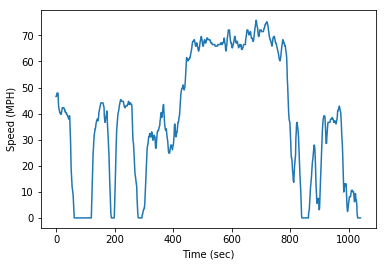

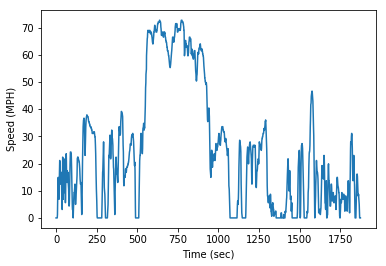

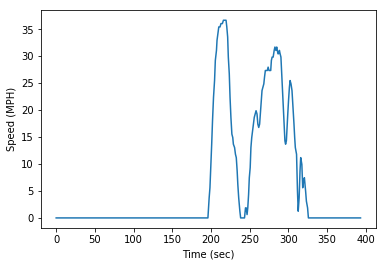

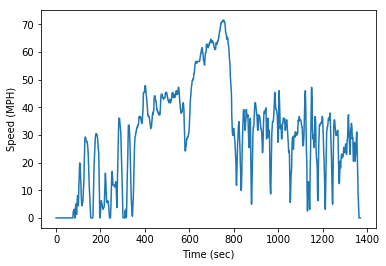

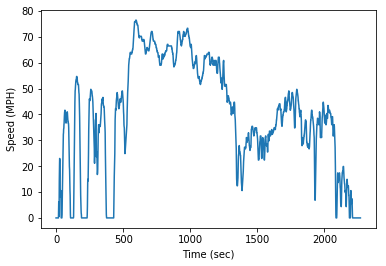

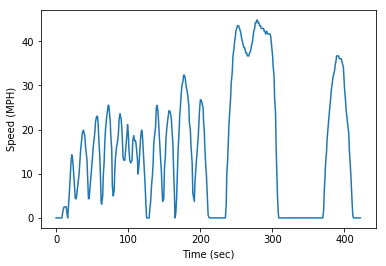

In [46]:
# TODO:
# look at speed vs time

file_no_merge = ["./data/{}-Cleaned.csv".format(i) for i in range(1, 7)]

def plot_speed_time(files):
    raw_dataset = pd.read_csv(files, sep=",", skipinitialspace=True)
    dataset = raw_dataset.copy()
    
    time = dataset.pop("Time (sec)")
    time.tail()
    speed = dataset.pop("Vehicle speed (MPH)")
    
   
    plt.xlabel("Time (sec)")
    plt.ylabel("Speed (MPH)")
    plt.plot(time, speed)
    plt.show()
    
for file in file_no_merge:
    plot_speed_time(file)

In [47]:
# Global parameters
max_num = 45
seed = 9
numEpochs = 250
cap_dataset = False # for testing purposes

In [16]:
#To-do: consider experimenting what happens when you remove it.
#if the maxNum = 45, there are ___1788___ obs whose MPG > 45

#a function that rounds down any value above 45 to 45.
#39 is the avg highway IFE. we then choose the number 45.
#see our doc/write up for more info?

def set_max_ife(dataset, max_num, wanted):
    #    count = 0
    if not wanted: return dataset
    copy = dataset.copy()
    for i in range(len(dataset.index)):
        if dataset.iloc[i, len(dataset.columns) - 1] > max_Num:
#            count += 1
            copy.iloc[i, len(dataset.columns) - 1] = max_Num
#    print(count)
    return copy
maxed_dataset = set_max_ife(dataset_accel, max_num, True)
maxed_dataset.sample(frac=1).reset_index(drop=True)

,Absolute load value (%),Absolute throttle position (%),Ambient air temperature (F),Barometric pressure (inHg),Calculated load value (%),Commanded fuel rail pressure A (inHg),Engine coolant temperature (F),Engine RPM (RPM),Fuel level input (%),Fuel rail pressure (psi),Fuel/Air commanded equivalence ratio,Intake air temperature (F),Intake manifold absolute pressure (inHg),Long term fuel % trim - Bank 1 (%),Mass air flow rate (lb/min),Vehicle speed (MPH),Fuel rate (gal/hr),Instant fuel economy (MPG)
0,61.960780,27.45098,64.4,29.5301,71.76471,3599.7190,186.8,1915.25,70.98039,1737.5520,0.993995,64.4,26.577090,12.50000,2.853711,65.243970,1.905096,34.247090
1,31.372550,23.13725,59.0,29.8254,44.70588,1990.3290,183.2,1336.75,63.92157,1083.4320,0.985455,93.2,27.758290,5.46875,1.091475,8.699197,0.736602,11.809900
2,35.686280,23.13725,78.8,29.8254,41.17647,1940.1280,188.6,2118.00,74.50980,994.9589,0.989969,78.8,28.053590,12.50000,1.586277,44.117360,1.063540,41.481600
3,10.588230,11.76471,87.8,29.8254,12.94118,885.9030,190.4,1488.75,78.03922,429.3117,1.000003,102.2,27.462990,7.81250,0.272538,30.447190,0.181837,167.442700
4,22.745100,11.76471,87.8,29.8254,43.13726,1083.7550,203.0,555.00,67.84314,543.8915,0.995246,107.6,14.469750,3.90625,0.295029,0.000000,0.196872,0.000000
5,86.666660,51.76471,75.2,29.8254,99.21568,4323.2070,186.8,1969.50,92.94118,2169.7650,0.995733,75.2,30.711300,7.81250,3.021732,26.718960,2.014053,13.266260
6,59.215690,29.80392,87.8,29.8254,66.66666,3933.4090,204.8,1968.25,63.92157,2089.9940,0.992257,107.6,28.939500,12.50000,3.873744,13.670170,2.626151,5.205400
7,35.294120,18.82353,64.4,29.8254,42.74510,1789.5240,195.8,1621.75,74.50980,890.5317,0.990366,80.6,22.738180,4.68750,1.113966,6.835083,0.746781,9.152725
8,22.352940,11.37255,64.4,29.8254,31.37255,921.3391,195.8,756.25,87.05882,484.4261,0.995764,80.6,14.174450,4.68750,0.293706,5.592341,0.195984,28.534720
9,28.627450,19.21569,66.2,29.8254,32.54902,1730.4640,186.8,2009.75,78.03922,855.7227,0.993050,68.0,22.442880,8.59375,1.637874,68.350830,1.097053,62.304020


In [17]:
#Plotting a histograph to see distribution of Vehicle speed (MPH) 
#sns.distplot(maxedDataSet['Vehicle speed (MPH)']);

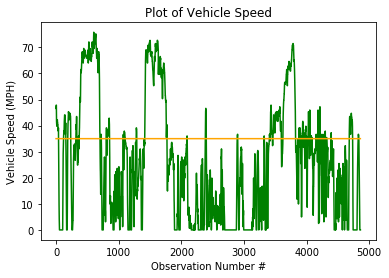

In [18]:
set35 = np.full(4859, 35)
set35
plt.plot(maxed_dataset['Vehicle speed (MPH)'], color='g')
plt.plot(set35, color='orange')
plt.xlabel('Observation Number #')
plt.ylabel('Vehicle Speed (MPH)')
plt.title('Plot of Vehicle Speed')
plt.figure(figsize=(36, 32))
plt.show()

In [19]:
#dataset.iloc[:, len(dataset.columns) - 3] #yes - way to access speed

#a function that counts how many data points are that whose speed is more than 35 
#(meaning that the car is in the highway)

def find_highway_speed(dataset, max_num):
    count = 0
    copy = dataset.copy()
    array_speed = []
    for i in range(len(dataset.index)):
        if dataset.iloc[i, len(dataset.columns) - 3] > max_num:
            count += 1
            array_speed.append(i)
    print(count)
    return array_speed

list_highway_speed = find_highway_speed(maxed_dataset, 35)

#for i in range(1,len(list_highway_speed))):
#    print(list_highway_speed[i])

1536


In [203]:
#print(list_highway_speed)
#for i in range(1,len(list_highway_speed))):
#    highway_speed_dataset = maxed_dataset[list_highway_speed[i]]


In [134]:
%%time 
#set seed here!
dataset_accel = dataset_accel.sample(frac=1).reset_index(drop=True)
dataset_no_speed = dataset_no_speed.sample(frac=1).reset_index(drop=True)

#creating data and splitting and random shuffling
#https://stackoverflow.com/questions/38250710/how-to-split-data-into-3-sets-train-validation-and-test/38251213#38251213
def train_validate_test_split(df, train_percent=.6, validate_percent=.2, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.loc[perm[:train_end]]
    validate = df.loc[perm[train_end:validate_end]]
    test = df.loc[perm[validate_end:]]
    return train, validate, test

np.random.seed(88)
dataset = dataset.sample(frac=1).reset_index(drop=True)
train, validate, test = train_validate_test_split(dataset)

train_labels = train.pop("Instant fuel economy (MPG)")
validate_labels = validate.pop("Instant fuel economy (MPG)")
test_labels = test.pop("Instant fuel economy (MPG)")

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 9.14 ms


In [117]:
#train.dtypes

In [135]:
train = train.apply(lambda col:pd.to_numeric(col, errors='coerce'))

# train_stats is a pandas data frame type
train_stats = train.describe(include = 'all')
train_stats

train_stats['Vehicle speed (MPH)']

count    2916.000000
mean       26.669737
std        22.193794
min         0.000000
25%         6.213712
50%        24.854850
75%        39.146390
max        75.185910
Name: Vehicle speed (MPH), dtype: float64

In [119]:
train_stats['Vehicle speed (MPH)'][1] #mean

26.764988836831275

In [120]:
#we have to normalize test and validation data set by using the mean and sd from training data set

# Even if we make our own, the values are similar but not exact. mine vs their mean and var
# issue: i am copying the set, find better way to not copy huge set
def getMean(column):
    sum = 0
    n = len(column)
    for i in range(n):
        sum += column.iloc[i]
    mean = sum / float(n)
    return mean

def getVariance(column, mean):
    squareMeanSum = 0
    n = len(column)
    for i in range(n):
        squareMeanSum += (column.iloc[i] - mean)**2
    var = math.sqrt(squareMeanSum / float(n))
    return var

# Normalize function from sklearn was buggy so we wrote our own
# Given a data set, normalize it and return the normalized data set
def normalizeSet(set):
    numRow = len(set.index)
    numCol = len(set.columns)
#     normed_set = set
    for col in range(numCol):
        column = set.iloc[:,col]
        mean = getMean(column)
        var = getVariance(column, mean)        
#         normalize each each value in a particular feature 
        for row in range(numRow):
            set.iloc[row, col] = float(set.iloc[row, col] - mean) / var
#             normed_set.iloc[row, col] = float(set.iloc[row, col] - mean) / var
#             print(set.iloc[row, col])
    return set
normed_train = normalizeSet(train)
normed_validate = normalizeSet(validate)
normed_test = normalizeSet(test)

In [265]:
#https://stackoverflow.com/questions/40758562/can-anyone-explain-me-standardscaler
#this method normalizes it according to the mean and sd from each set instead of 
#normalizaing from training set only# scaler = StandardScaler()

# a bit buggy
# normed_train = scaler.fit_transform(train)
# normed_validate = scaler.fit_transform(validate)
# normed_test = scaler.fit_transform(test)



In [121]:
# build models with different number of activation layers and number of nodes to explore
# which one has lowest testing error
def build_model_A():
  model = keras.Sequential([
    layers.Dense(5, activation=tf.nn.relu, input_shape=[len(train.keys())]),
    layers.Dense(1)
  ])
  optimizer = tf.keras.optimizers.RMSprop(0.001)
  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

def build_model_B():
  model = keras.Sequential([
    layers.Dense(20, activation=tf.nn.relu, input_shape=[len(train.keys())]),
    layers.Dense(1)
  ])
  optimizer = tf.keras.optimizers.RMSprop(0.001)
  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

def build_model_C():
  model = keras.Sequential([
    layers.Dense(15, activation=tf.nn.relu, input_shape=[len(train.keys())]),
    layers.Dense(10, activation=tf.nn.relu),
    layers.Dense(5, activation=tf.nn.relu),
    layers.Dense(1)
  ])
  optimizer = tf.keras.optimizers.RMSprop(0.001)
  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model



In [105]:
%%time
model_A = build_model_A()
model_A.summary()
model_B = build_model_B()
model_B.summary()
model_C = build_model_C()
model_C.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 5)                 90        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 6         
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 20)                360       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 21        
Total params: 381
Trainable params: 381
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)    

In [25]:
%%time
# Also buggy: 

#change batch size? try early stop - The patience parameter is the amount of epochs to check for improvement
#early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

#history_object = model.fit(train, train_labels, epochs=100, verbose=2,
#         validation_data=(validate, validate_labels), callbacks=[early_stop])

history_object_A = model_A.fit(normed_train, train_labels, epochs=250, verbose=0,
         validation_data=(normed_validate, validate_labels))

Instructions for updating:
Use tf.cast instead.
CPU times: user 45.1 s, sys: 20.8 s, total: 1min 5s
Wall time: 27.9 s


In [106]:
%%time

# See where the error jumps on a particular example (maybe jumps when on high way or city)
history_object_B = model_B.fit(normed_train, train_labels, epochs=250, verbose=2,
         validation_data=(normed_validate, validate_labels))

Train on 2916 samples, validate on 972 samples
Epoch 1/250
 - 0s - loss: 8838.0981 - mean_absolute_error: 55.7080 - mean_squared_error: 8838.0977 - val_loss: 11761.2984 - val_mean_absolute_error: 58.0790 - val_mean_squared_error: 11761.2998
Epoch 2/250
 - 0s - loss: 8519.4072 - mean_absolute_error: 54.5967 - mean_squared_error: 8519.4072 - val_loss: 11414.2262 - val_mean_absolute_error: 57.0081 - val_mean_squared_error: 11414.2275
Epoch 3/250
 - 0s - loss: 8162.2842 - mean_absolute_error: 53.2916 - mean_squared_error: 8162.2852 - val_loss: 10989.1029 - val_mean_absolute_error: 55.6936 - val_mean_squared_error: 10989.1025
Epoch 4/250
 - 0s - loss: 7738.4687 - mean_absolute_error: 51.7903 - mean_squared_error: 7738.4697 - val_loss: 10482.5041 - val_mean_absolute_error: 54.1720 - val_mean_squared_error: 10482.5039
Epoch 5/250
 - 0s - loss: 7231.4170 - mean_absolute_error: 49.9358 - mean_squared_error: 7231.4165 - val_loss: 9888.8112 - val_mean_absolute_error: 52.2979 - val_mean_squared_er

Epoch 44/250
 - 0s - loss: 1846.0411 - mean_absolute_error: 19.6111 - mean_squared_error: 1846.0410 - val_loss: 3610.4075 - val_mean_absolute_error: 21.6850 - val_mean_squared_error: 3610.4075
Epoch 45/250
 - 0s - loss: 1834.6073 - mean_absolute_error: 19.4241 - mean_squared_error: 1834.6067 - val_loss: 3595.6040 - val_mean_absolute_error: 21.5618 - val_mean_squared_error: 3595.6040
Epoch 46/250
 - 0s - loss: 1822.2791 - mean_absolute_error: 19.2061 - mean_squared_error: 1822.2792 - val_loss: 3575.9332 - val_mean_absolute_error: 21.6764 - val_mean_squared_error: 3575.9331
Epoch 47/250
 - 0s - loss: 1809.5547 - mean_absolute_error: 19.2830 - mean_squared_error: 1809.5548 - val_loss: 3572.0282 - val_mean_absolute_error: 21.3256 - val_mean_squared_error: 3572.0281
Epoch 48/250
 - 0s - loss: 1797.0251 - mean_absolute_error: 19.0945 - mean_squared_error: 1797.0247 - val_loss: 3561.2598 - val_mean_absolute_error: 21.1118 - val_mean_squared_error: 3561.2598
Epoch 49/250
 - 0s - loss: 1786.424

Epoch 87/250
 - 0s - loss: 1543.9562 - mean_absolute_error: 16.3542 - mean_squared_error: 1543.9564 - val_loss: 3249.9979 - val_mean_absolute_error: 18.9512 - val_mean_squared_error: 3249.9978
Epoch 88/250
 - 0s - loss: 1539.8214 - mean_absolute_error: 16.3117 - mean_squared_error: 1539.8215 - val_loss: 3234.4542 - val_mean_absolute_error: 19.2183 - val_mean_squared_error: 3234.4541
Epoch 89/250
 - 0s - loss: 1534.1676 - mean_absolute_error: 16.4571 - mean_squared_error: 1534.1672 - val_loss: 3231.1257 - val_mean_absolute_error: 18.9210 - val_mean_squared_error: 3231.1255
Epoch 90/250
 - 0s - loss: 1530.8682 - mean_absolute_error: 16.2866 - mean_squared_error: 1530.8682 - val_loss: 3231.5221 - val_mean_absolute_error: 18.8538 - val_mean_squared_error: 3231.5225
Epoch 91/250
 - 0s - loss: 1528.1808 - mean_absolute_error: 16.2385 - mean_squared_error: 1528.1809 - val_loss: 3230.7536 - val_mean_absolute_error: 18.8033 - val_mean_squared_error: 3230.7542
Epoch 92/250
 - 0s - loss: 1524.011

Epoch 130/250
 - 0s - loss: 1407.6308 - mean_absolute_error: 14.9142 - mean_squared_error: 1407.6309 - val_loss: 3043.6991 - val_mean_absolute_error: 17.4115 - val_mean_squared_error: 3043.6987
Epoch 131/250
 - 0s - loss: 1405.7259 - mean_absolute_error: 14.8671 - mean_squared_error: 1405.7260 - val_loss: 3033.1835 - val_mean_absolute_error: 17.4907 - val_mean_squared_error: 3033.1836
Epoch 132/250
 - 0s - loss: 1403.7285 - mean_absolute_error: 14.7939 - mean_squared_error: 1403.7285 - val_loss: 3022.6027 - val_mean_absolute_error: 17.5889 - val_mean_squared_error: 3022.6025
Epoch 133/250
 - 0s - loss: 1400.0052 - mean_absolute_error: 14.8448 - mean_squared_error: 1400.0054 - val_loss: 3013.3099 - val_mean_absolute_error: 17.6566 - val_mean_squared_error: 3013.3096
Epoch 134/250
 - 0s - loss: 1397.0169 - mean_absolute_error: 14.9035 - mean_squared_error: 1397.0168 - val_loss: 3016.2163 - val_mean_absolute_error: 17.4890 - val_mean_squared_error: 3016.2163
Epoch 135/250
 - 0s - loss: 13

Epoch 173/250
 - 0s - loss: 1319.4799 - mean_absolute_error: 14.2242 - mean_squared_error: 1319.4800 - val_loss: 2898.7253 - val_mean_absolute_error: 16.8927 - val_mean_squared_error: 2898.7251
Epoch 174/250
 - 0s - loss: 1318.1516 - mean_absolute_error: 14.1165 - mean_squared_error: 1318.1517 - val_loss: 2886.8873 - val_mean_absolute_error: 17.0382 - val_mean_squared_error: 2886.8875
Epoch 175/250
 - 0s - loss: 1315.5256 - mean_absolute_error: 14.1819 - mean_squared_error: 1315.5256 - val_loss: 2887.7736 - val_mean_absolute_error: 16.9219 - val_mean_squared_error: 2887.7737
Epoch 176/250
 - 0s - loss: 1314.0948 - mean_absolute_error: 14.1588 - mean_squared_error: 1314.0945 - val_loss: 2887.0015 - val_mean_absolute_error: 16.8403 - val_mean_squared_error: 2887.0010
Epoch 177/250
 - 0s - loss: 1311.7634 - mean_absolute_error: 14.1453 - mean_squared_error: 1311.7631 - val_loss: 2886.1846 - val_mean_absolute_error: 16.8189 - val_mean_squared_error: 2886.1843
Epoch 178/250
 - 0s - loss: 13

Epoch 216/250
 - 0s - loss: 1250.5844 - mean_absolute_error: 13.7867 - mean_squared_error: 1250.5840 - val_loss: 2810.6769 - val_mean_absolute_error: 17.1084 - val_mean_squared_error: 2810.6768
Epoch 217/250
 - 0s - loss: 1247.7341 - mean_absolute_error: 13.9289 - mean_squared_error: 1247.7341 - val_loss: 2822.7596 - val_mean_absolute_error: 16.4489 - val_mean_squared_error: 2822.7600
Epoch 218/250
 - 0s - loss: 1249.0855 - mean_absolute_error: 13.7297 - mean_squared_error: 1249.0853 - val_loss: 2808.2607 - val_mean_absolute_error: 16.6870 - val_mean_squared_error: 2808.2610
Epoch 219/250
 - 0s - loss: 1246.5825 - mean_absolute_error: 13.7501 - mean_squared_error: 1246.5824 - val_loss: 2806.9062 - val_mean_absolute_error: 16.5962 - val_mean_squared_error: 2806.9065
Epoch 220/250
 - 0s - loss: 1244.0136 - mean_absolute_error: 13.7866 - mean_squared_error: 1244.0137 - val_loss: 2810.3644 - val_mean_absolute_error: 16.5640 - val_mean_squared_error: 2810.3645
Epoch 221/250
 - 0s - loss: 12

In [122]:
%%time
# See where the error jumps on a particular example (maybe jumps when on high way or city)
history_object_C = model_C.fit(normed_train, train_labels, epochs=250, verbose=2,
         validation_data=(normed_validate, validate_labels))

Train on 2916 samples, validate on 972 samples
Epoch 1/250
 - 0s - loss: 296.4036 - mean_absolute_error: 6.2599 - mean_squared_error: 296.4036 - val_loss: 827.7586 - val_mean_absolute_error: 11.8170 - val_mean_squared_error: 827.7586
Epoch 2/250
 - 0s - loss: 276.6616 - mean_absolute_error: 6.4241 - mean_squared_error: 276.6616 - val_loss: 564.2799 - val_mean_absolute_error: 9.9656 - val_mean_squared_error: 564.2800
Epoch 3/250
 - 0s - loss: 262.3265 - mean_absolute_error: 6.3323 - mean_squared_error: 262.3265 - val_loss: 623.7341 - val_mean_absolute_error: 10.1506 - val_mean_squared_error: 623.7340
Epoch 4/250
 - 0s - loss: 272.8162 - mean_absolute_error: 6.1922 - mean_squared_error: 272.8163 - val_loss: 580.3848 - val_mean_absolute_error: 9.4863 - val_mean_squared_error: 580.3849
Epoch 5/250
 - 0s - loss: 262.1080 - mean_absolute_error: 6.1922 - mean_squared_error: 262.1081 - val_loss: 865.3140 - val_mean_absolute_error: 12.9183 - val_mean_squared_error: 865.3140
Epoch 6/250
 - 0s - 

Epoch 45/250
 - 0s - loss: 168.2400 - mean_absolute_error: 5.6266 - mean_squared_error: 168.2400 - val_loss: 673.1664 - val_mean_absolute_error: 10.4561 - val_mean_squared_error: 673.1664
Epoch 46/250
 - 0s - loss: 154.8362 - mean_absolute_error: 5.4728 - mean_squared_error: 154.8362 - val_loss: 767.0554 - val_mean_absolute_error: 11.2650 - val_mean_squared_error: 767.0555
Epoch 47/250
 - 0s - loss: 156.1789 - mean_absolute_error: 5.5751 - mean_squared_error: 156.1789 - val_loss: 544.7108 - val_mean_absolute_error: 10.6127 - val_mean_squared_error: 544.7108
Epoch 48/250
 - 0s - loss: 161.5396 - mean_absolute_error: 5.4557 - mean_squared_error: 161.5396 - val_loss: 686.3468 - val_mean_absolute_error: 10.7581 - val_mean_squared_error: 686.3466
Epoch 49/250
 - 0s - loss: 153.3886 - mean_absolute_error: 5.5320 - mean_squared_error: 153.3885 - val_loss: 738.1657 - val_mean_absolute_error: 10.9644 - val_mean_squared_error: 738.1657
Epoch 50/250
 - 0s - loss: 151.2169 - mean_absolute_error: 5

Epoch 89/250
 - 0s - loss: 109.3528 - mean_absolute_error: 5.1067 - mean_squared_error: 109.3529 - val_loss: 851.2233 - val_mean_absolute_error: 11.1676 - val_mean_squared_error: 851.2234
Epoch 90/250
 - 0s - loss: 124.6466 - mean_absolute_error: 5.0570 - mean_squared_error: 124.6466 - val_loss: 640.6502 - val_mean_absolute_error: 10.0503 - val_mean_squared_error: 640.6502
Epoch 91/250
 - 0s - loss: 103.8576 - mean_absolute_error: 5.0104 - mean_squared_error: 103.8577 - val_loss: 590.2709 - val_mean_absolute_error: 10.5210 - val_mean_squared_error: 590.2709
Epoch 92/250
 - 0s - loss: 111.1847 - mean_absolute_error: 5.1444 - mean_squared_error: 111.1846 - val_loss: 645.6738 - val_mean_absolute_error: 10.1249 - val_mean_squared_error: 645.6739
Epoch 93/250
 - 0s - loss: 115.8179 - mean_absolute_error: 4.9755 - mean_squared_error: 115.8179 - val_loss: 779.7899 - val_mean_absolute_error: 10.8153 - val_mean_squared_error: 779.7898
Epoch 94/250
 - 0s - loss: 121.3400 - mean_absolute_error: 5

Epoch 133/250
 - 0s - loss: 77.8020 - mean_absolute_error: 4.6532 - mean_squared_error: 77.8020 - val_loss: 662.1785 - val_mean_absolute_error: 9.9796 - val_mean_squared_error: 662.1785
Epoch 134/250
 - 0s - loss: 92.5879 - mean_absolute_error: 4.7397 - mean_squared_error: 92.5879 - val_loss: 738.3024 - val_mean_absolute_error: 11.4861 - val_mean_squared_error: 738.3024
Epoch 135/250
 - 0s - loss: 87.6399 - mean_absolute_error: 4.5332 - mean_squared_error: 87.6399 - val_loss: 649.5514 - val_mean_absolute_error: 9.2949 - val_mean_squared_error: 649.5515
Epoch 136/250
 - 0s - loss: 96.4496 - mean_absolute_error: 4.6124 - mean_squared_error: 96.4496 - val_loss: 630.0551 - val_mean_absolute_error: 11.1890 - val_mean_squared_error: 630.0550
Epoch 137/250
 - 0s - loss: 98.4620 - mean_absolute_error: 4.5822 - mean_squared_error: 98.4620 - val_loss: 697.0234 - val_mean_absolute_error: 10.6179 - val_mean_squared_error: 697.0235
Epoch 138/250
 - 0s - loss: 88.2480 - mean_absolute_error: 4.5367 -

Epoch 177/250
 - 0s - loss: 74.5960 - mean_absolute_error: 4.3246 - mean_squared_error: 74.5960 - val_loss: 898.2998 - val_mean_absolute_error: 11.1377 - val_mean_squared_error: 898.2998
Epoch 178/250
 - 0s - loss: 76.6057 - mean_absolute_error: 4.3780 - mean_squared_error: 76.6057 - val_loss: 613.4384 - val_mean_absolute_error: 9.4230 - val_mean_squared_error: 613.4384
Epoch 179/250
 - 0s - loss: 80.1489 - mean_absolute_error: 4.4344 - mean_squared_error: 80.1489 - val_loss: 645.5469 - val_mean_absolute_error: 10.8170 - val_mean_squared_error: 645.5469
Epoch 180/250
 - 0s - loss: 80.2913 - mean_absolute_error: 4.2949 - mean_squared_error: 80.2913 - val_loss: 701.3468 - val_mean_absolute_error: 10.0877 - val_mean_squared_error: 701.3467
Epoch 181/250
 - 0s - loss: 78.4354 - mean_absolute_error: 4.3262 - mean_squared_error: 78.4354 - val_loss: 588.5095 - val_mean_absolute_error: 9.8565 - val_mean_squared_error: 588.5095
Epoch 182/250
 - 0s - loss: 76.9775 - mean_absolute_error: 4.4482 -

Epoch 221/250
 - 0s - loss: 68.9087 - mean_absolute_error: 4.0612 - mean_squared_error: 68.9087 - val_loss: 743.3761 - val_mean_absolute_error: 10.9281 - val_mean_squared_error: 743.3761
Epoch 222/250
 - 0s - loss: 62.8849 - mean_absolute_error: 4.1316 - mean_squared_error: 62.8849 - val_loss: 526.6413 - val_mean_absolute_error: 8.8037 - val_mean_squared_error: 526.6413
Epoch 223/250
 - 0s - loss: 70.7967 - mean_absolute_error: 4.1671 - mean_squared_error: 70.7967 - val_loss: 873.8329 - val_mean_absolute_error: 12.9972 - val_mean_squared_error: 873.8328
Epoch 224/250
 - 0s - loss: 65.9804 - mean_absolute_error: 4.1853 - mean_squared_error: 65.9805 - val_loss: 597.6019 - val_mean_absolute_error: 9.6123 - val_mean_squared_error: 597.6019
Epoch 225/250
 - 0s - loss: 64.8764 - mean_absolute_error: 4.1575 - mean_squared_error: 64.8764 - val_loss: 791.6464 - val_mean_absolute_error: 10.5315 - val_mean_squared_error: 791.6464
Epoch 226/250
 - 0s - loss: 59.5719 - mean_absolute_error: 4.1637 -

In [124]:
hist_C = pd.DataFrame(history_object_C.history)
hist_C['epoch'] = history_object_C.epoch
hist_C.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
245,64.245297,3.930225,64.245331,638.905247,9.352635,638.905273,245
246,75.659750,4.073984,75.659752,728.482823,11.190147,728.482849,246
247,50.273898,4.008298,50.273899,822.514214,14.142934,822.514221,247
248,62.865683,4.070818,62.865681,770.756857,10.503278,770.756958,248
249,59.931322,3.942995,59.931320,433.424285,9.098015,433.424347,249


In [125]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,30])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.xlim([0,250])
  plt.ylim([0, 8000])
  plt.legend()
  plt.show()

In [ ]:
plot_history(history_object_A)

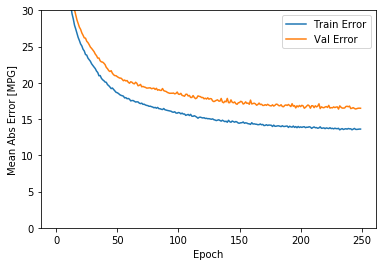

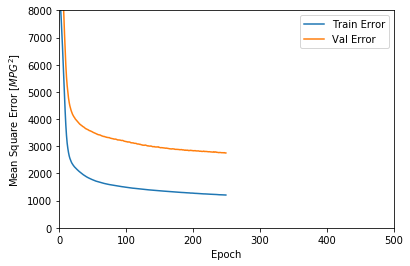

In [110]:
# Increase num epochs? in reference to 2nd graph
# Mean abs error seems to be a better cost function

# For Mean Abs,the variance starts to in|crease after epoch 200, maybe stop there?
# For Mean Square, the variance start to increase after epoch 150, stop here?

# Mean Squared Error seems to be industry standard for regression problems. 
plot_history(history_object_B)

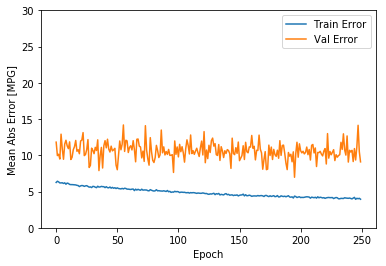

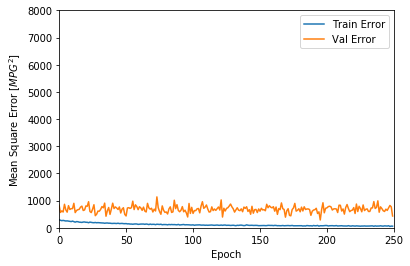

In [126]:
plot_history(history_object_C)

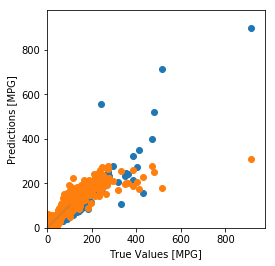

In [127]:
def plot_scatter(test_predictions):
    plt.scatter(test_labels, test_predictions)
    plt.xlabel('True Values [MPG]')
    plt.ylabel('Predictions [MPG]')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim([0,plt.xlim()[1]])
    plt.ylim([0,plt.ylim()[1]])
    _ = plt.plot([-100, 100], [-100, 100])

test_predictions_C = model_C.predict(normed_test).flatten()
test_predictions_B = model_B.predict(normed_test).flatten()

plot_scatter(test_predictions_C)
plot_scatter(test_predictions_B)



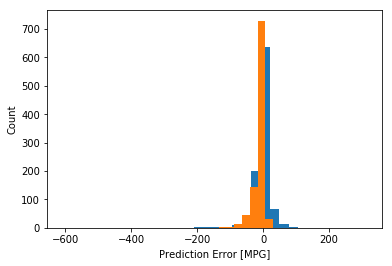

In [128]:
def getHist(test_predictions, test_labels):
    error = test_predictions - test_labels
    plt.xlabel("Prediction Error [MPG]")
    _ = plt.ylabel("Count")
    plt.hist(error, bins = 25)
    return error
errorB = getHist(test_predictions_B, test_labels)
errorC = getHist(test_predictions_C, test_labels)



In [129]:
def calculate_percent_error(test_predictions, test_labels):
    difference = abs(test_predictions - test_labels)
    error = difference / test_labels
    unprocessed_error_percentage = error * 100
    np_error = np.array(unprocessed_error_percentage)
    a = np.ma.masked_invalid(np_error)
    error_percentage = a.sum() / (len(unprocessed_error_percentage) - np.count_nonzero(np.isinf(unprocessed_error_percentage)))
    print(error_percentage)
    return (error_percentage)
    
p_err_B = calculate_percent_error(test_predictions_B, test_labels)
p_err_C = calculate_percent_error(test_predictions_C, test_labels)

# #https://sciencenotes.org/calculate-percent-error/
# difference_B = abs(test_predictions_B - test_labels)
# difference_C = abs(test_predictions_C - test_labels)
# #difference
# error_B = difference_B / test_labels
# error_C - difference_C / test_labels
# #note that when I print unprocessed_error_percentage, it shows inf value. this is from dividing by 0 from the actual 
# #test values that are 0 sometimes. 
# unprocessed_error_percentage_B = error_B * 100
# np_error_B = np.array(unprocessed_error_percentage)
# a = np.ma.masked_invalid(np_error)
# error_percentage = a.sum() / (len(unprocessed_error_percentage) - np.count_nonzero(np.isinf(unprocessed_error_percentage)))
# error_percentage

45.68767961231996
23.209568125763674


In [131]:
def compute_acc(error_percentage):
    accuracy = 100 - error_percentage
    print(accuracy)
    
compute_acc(p_err_B)
compute_acc(p_err_C)

54.31232038768004
76.79043187423633


In [ ]:
def print_weights()

In [271]:
# Range of how wrong we allow a prediction to be, random number for now. 
# unsure what is considered "good"
# discussion: what is a good epsilon value

# errorVec is y - y_hat, abs value will be taken care of inside here
def accuracy(errorVec, epsilon):
    numExamples = len(errorVec)
    numCorrect = 0
    for error in errorVec:
        if abs(error) <= epsilon:
            numCorrect += 1
    print("Accuracy with epsilon {}:".format(epsilon), (numCorrect / float(numExamples))*100,"%")

In [273]:
# Increased accuracy to 42% after cleaning data and setting maxed IFO
# Epoch is set to 500
epsilon = 1
test_predictions_B = model_B.predict(normed_test).flatten()
test_labels_np = test_labels.values
errorVec = test_predictions_B - test_labels_np
print(max(test_predictions_B))
accuracy(errorVec, epsilon)

368.85986
Accuracy with epsilon 1: 11.522633744855968 %


In [277]:
# implementing linear regression 
# build linear model
# TODO: implement linear regression with predictions capped and without predictions capped
# are we also editting our predictions?
lm = LinearRegression()

# the data was editting so that the max IFO is 45
model = lm.fit(normed_train, train_labels)
predictions = lm.predict(normed_test) # this is a np array, be careful
print(max(predictions))

# expects series
def cap_predictions(predictions, max_num):
    copy = np.copy(predictions)
    for index, val in enumerate(copy):
        if val > max_num:
            copy[index] = max_num
        if val < 0:
            copy[index] = 0
    return copy
capped_predictions = cap_predictions(predictions, max_num)

191.39420928307382


In [275]:
# Linear Regression plot
# lots of weird looking outliers at true values = 0, 45

def plot_scatter(y, y_hat):
    
    plt.figure
    plt.scatter(y, y_hat)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")

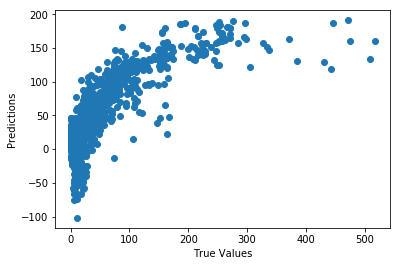

In [276]:
# prediction no cap
plot_scatter(test_labels, predictions)

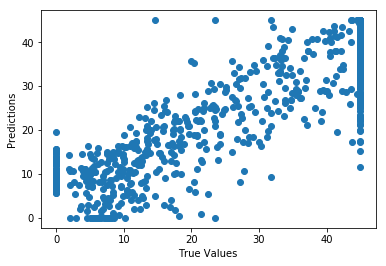

In [243]:
# prediction with cap
plot_scatter(test_labels, capped_predictions)

In [244]:
# Accuracy of linear regression

accuracy(test_labels - predictions, epsilon)
accuracy(test_labels - capped_predictions, epsilon)

Accuracy:  7.510288065843622 %
Accuracy:  18.51851851851852 %
